In [1]:
import pruebas
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter('error')
omega=1
ampl0=0.000001
mu=0.1*omega
g=0.2*omega
T=np.pi/g
nt=100
tlist = np.linspace(0,T, nt)
gamma=0.01*omega
Nbs=np.linspace(0.01,2,10)
x=2
y=0.1
barrier=0.9755
with warnings.catch_warnings():
    warnings.simplefilter('error')
    for Nb in Nbs:
        value=True
        while value==True:
            try:
                ratio,power,opt_result,energy,ergotropy=pruebas.get_result(omega,ampl0,mu,g,gamma,Nb,tlist,100,rate=y,energy=x,stop=10000)
                if (ratio>barrier) and (power<500):
                    value=False
                    with open(f'T={T}_Nb={Nb}_target={x}_lambda={y}_barrier_{barrier}.npy', 'wb') as f:
                        np.save(f, ratio)
                        np.save(f, power)
                        np.save(f,np.transpose(np.array(opt_result.optimized_controls)))
                        np.save(f,energy)
                        np.save(f,ergotropy)
                else:
                    x+=0.05
                    print(ratio,x)
                    if x<=0:
                        value=False
            except:
                x-=0.05
                if x<=0:
                    value=False

iter.       J_T    ∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0      8.65e-01    0.00e+00   8.65e-01        n/a        n/a     0
1      8.40e-01    1.60e-02   8.56e-01  -2.49e-02  -8.88e-03     0
2      8.04e-01    2.44e-02   8.28e-01  -3.61e-02  -1.17e-02     0
3      7.47e-01    4.12e-02   7.89e-01  -5.66e-02  -1.54e-02     0
4      6.49e-01    8.03e-02   7.29e-01  -9.83e-02  -1.80e-02     0
5      4.62e-01    1.86e-01   6.48e-01  -1.87e-01  -7.86e-04     0


In [2]:
import os

In [3]:
cwd = os.getcwd()

In [4]:
import pathlib

z=list(pathlib.Path(cwd).glob('*.npy'))

In [5]:
len(z)

365

In [6]:
Nbs=np.linspace(0.01,2,50)


In [7]:
len(Nbs)

50

In [8]:
c=0
k={}
for j in range(0,len(Nbs)):    
    z2=[i  for i in z if str(Nbs[j]) in str(i)]
    k[str(Nbs[j])]=z2
    c+=len(z2)

In [9]:
k['0.01']

[PosixPath('/mnt/c/Users/gsuarez/Documents/PhD notebooks/krotov/Mixed/Linear/T=15.707963267948966_Nb=0.01_target=1.3999999999999986_lambda=100.npy'),
 PosixPath('/mnt/c/Users/gsuarez/Documents/PhD notebooks/krotov/Mixed/Linear/T=15.707963267948966_Nb=0.01_target=1.399999999999999_lambda=100_barrier_0.96.npy'),
 PosixPath('/mnt/c/Users/gsuarez/Documents/PhD notebooks/krotov/Mixed/Linear/T=15.707963267948966_Nb=0.01_target=2.2_lambda=1_barrier_0.956243.npy'),
 PosixPath('/mnt/c/Users/gsuarez/Documents/PhD notebooks/krotov/Mixed/Linear/T=15.707963267948966_Nb=0.01_target=2.3_lambda=0.1_barrier_0.97.npy'),
 PosixPath('/mnt/c/Users/gsuarez/Documents/PhD notebooks/krotov/Mixed/Linear/T=15.707963267948966_Nb=0.01_target=2.5999999999999996_lambda=1_barrier_0.937243.npy'),
 PosixPath('/mnt/c/Users/gsuarez/Documents/PhD notebooks/krotov/Mixed/Linear/T=15.707963267948966_Nb=0.01_target=2.6000000000000005_lambda=1_barrier_0.947243.npy'),
 PosixPath('/mnt/c/Users/gsuarez/Documents/PhD notebooks/kro

In [10]:
def field_energy(field,tlist,T,nt):
    EField=field
    EEnergy=np.zeros(len(tlist))
    EEnergy[0]=(np.square(EField[0]))*(T/nt)
    a=0
    for i in range (1,nt):
        a+=np.square(EField[i-1])
        EEnergy[i]=(np.square(EField[i])+a)*(T/nt)
    return EEnergy[nt-1]

In [16]:
ratio=[]
power=[]
energy=[]
ergotropy=[]
max_ratio,max_power=[],[]
max_energy,max_ergotropy=[],[]
field=[]
opt=[]
omega=1
ampl0=0.000001
mu=0.1*omega
g=0.2*omega
T=np.pi/g
nt=100
tlist = np.linspace(0,T, nt)
for key in k:
    ratio=[]
    power=[]
    energy=[]
    ergotropy=[]
    opt=[]
    for i in range(len(k[key])):
        with open(k[key][i],'rb') as f:
            ratio.append(np.load(f,allow_pickle=True)[()])
            power.append(np.load(f,allow_pickle=True)[()])
            nn=np.load(f,allow_pickle=True)
            opt.append(field_energy(nn,tlist,T,nt))
            energy.append(np.load(f,allow_pickle=True)[-1])
            ergotropy.append(np.load(f,allow_pickle=True)[-1])
    options=[np.argmax(opt),np.argmin(opt),np.argmax(ratio),np.argmax(ergotropy)]
    max_ratio.append(ratio[options[0]])
    max_power.append(power[options[0]])
    max_energy.append(energy[options[0]])
    max_ergotropy.append(ergotropy[options[0]])
    field.append(opt[options[0]])

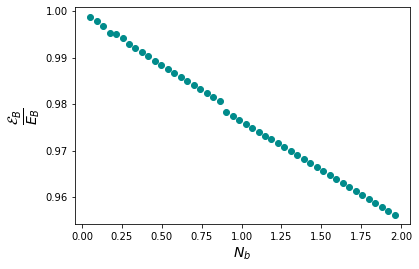

In [17]:
plt.scatter(Nbs[1:-1],np.array(max_ratio)[1:-1],color='darkcyan')
plt.xlabel(r'$N_b$',fontsize=14)
plt.ylabel(r'$\frac{\mathcal{E}_{B}}{E_{B}}$',fontsize=20)
plt.show()

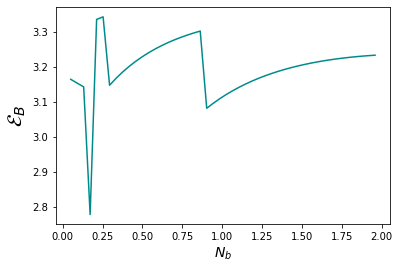

In [22]:
plt.plot(Nbs[1:-1],np.array(max_ergotropy)[1:-1],color='darkcyan')
plt.xlabel(r'$N_b$',fontsize=14)
plt.ylabel(r'$\mathcal{E}_{B}$',fontsize=20)
plt.show()

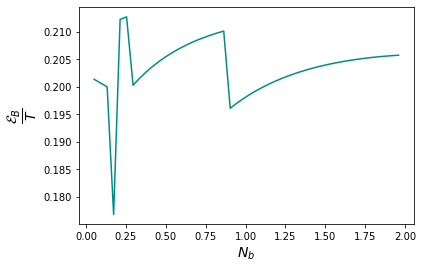

In [19]:
plt.plot(Nbs[1:-1],np.array(max_power)[1:-1],color='darkcyan')
plt.xlabel(r'$N_b$',fontsize=14)
plt.ylabel(r'$\frac{\mathcal{E}_{B}}{T}$',fontsize=20)
plt.show()

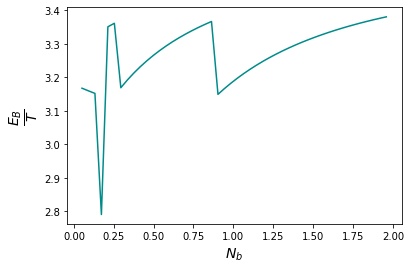

In [20]:
plt.plot(Nbs[1:-1],np.array(max_energy)[1:-1],color='darkcyan')
plt.xlabel(r'$N_b$',fontsize=14)
plt.ylabel(r'$\frac{E_{B}}{T}$',fontsize=20)
plt.show()

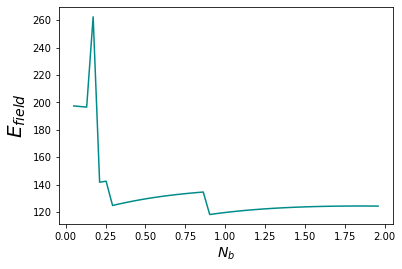

In [21]:
plt.plot(Nbs[1:-1],np.array(field)[1:-1],color='darkcyan')
plt.xlabel(r'$N_b$',fontsize=14)
plt.ylabel(r'$E_{field}$',fontsize=20)
plt.show()